In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [9]:
flag_types = 'france','turkey','tunis'
path2 = Path('flags')

In [10]:
path2.mkdir(exist_ok=True)
for o in flag_types:
    dest = (path2/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} flag')
    download_images(dest, urls=results)

In [21]:
fns2 = get_image_files(path2)
fns2

(#740) [Path('flags/tunis/00000191.jpg'),Path('flags/tunis/00000079.jpg'),Path('flags/tunis/00000210.jpeg'),Path('flags/tunis/00000110.jpg'),Path('flags/tunis/00000169.jpg'),Path('flags/tunis/00000153.jpg'),Path('flags/tunis/00000084.jpg'),Path('flags/tunis/00000158.jpg'),Path('flags/tunis/00000052.jpg'),Path('flags/tunis/00000043.gif')...]

In [12]:
failed2 = verify_images(fns2)

(#3) [Path('bears/teddy/00000147.jpg'),Path('bears/teddy/00000135.png'),Path('bears/grizzly/00000049.jpg')]

In [13]:
failed2.map(Path.unlink);

In [14]:
flags = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls2 = flags.dataloaders(path2)

In [18]:
dls2.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


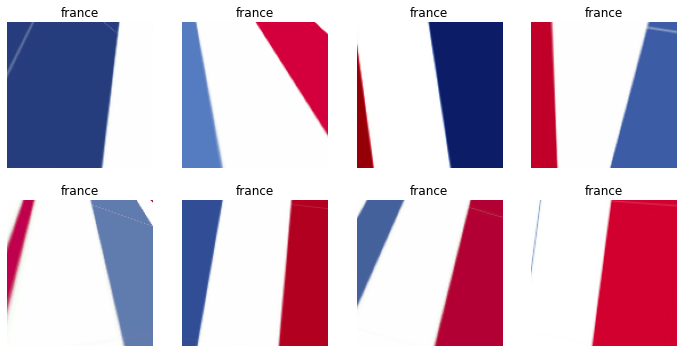

In [22]:
flags = flags.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls2 = flags.dataloaders(path2)
dls2.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
flags = flags.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls2 = flags.dataloaders(path2)

In [24]:
learn2 = cnn_learner(dls2, resnet18, metrics=error_rate)
learn2.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.201947,0.654566,0.168919,00:25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.362702,0.341254,0.087838,00:25
1,0.243724,0.297448,0.074324,00:25
2,0.194805,0.272781,0.060811,00:25
3,0.155843,0.253042,0.060811,00:26


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


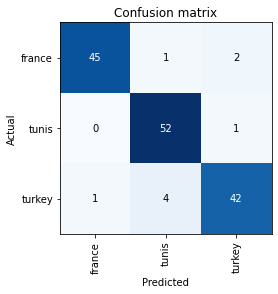

In [25]:
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

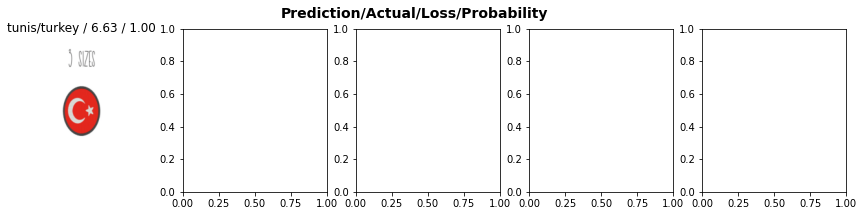

In [26]:
interp2.plot_top_losses(5, nrows=1)

In [27]:
cleaner = ImageClassifierCleaner(learn2)
cleaner

In [28]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn2.export("flag.pkl")

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#0) []